In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pm4py
import pickle
import itertools
import seed_to_harvest as sth

In [ ]:
sites_pth = 'Source/Data/sites'
cdl_pth = 'Source/Data/cdl'
season_pth = 'Source/Data/season'

In [3]:
loglist=[]
warningslist=[]
faillist=[]
#load location list
location=np.load('Source/masklayers/wgscenterlist.npy')
for i in np.arange(0,148,1):
    #loading data
    sid=i
    ts=pd.read_hdf(sites_pth+f'/Site{sid:03}_NBARint.h5')
    cdl=pd.read_hdf(cdl_pth+f'/Site{sid:03}_cdl.h5')
    season=pd.read_hdf(season_pth+f'/Site{sid:03}_season_day.h5')
    loc=location[i]

    try:
        timelog, warnings = sth.eventtime_MACD(ts, season, cdl, sid, loc,'Power','Idaho','USA', 2007)
        loglist.append(timelog)
        warningslist.append(warnings)
    except Exception as e:
        print(f"Error encountered for site {sid}: {e}")
        faillist.append(sid)
timelog=pd.concat(loglist, axis=0, join='inner', ignore_index=True)
timelog

Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: e

,Activity,Timestamp,Time_uncertainty,CaseID,Crop,SiteID,WGS84_lon_lat,County,State,Country,NDVI_range,num_valid_est
0,Emergence,2007-05-30,"[2007-05-25 00:00:00, 2007-05-30 00:00:00, 200...",0000_2007,Potatoes,0,"[-113.05221260418197, 42.746131542842555]",Power,Idaho,USA,"[0.28045393722494405, 0.2858478903330694]",3
1,Maturity,2007-07-10,"[2007-07-14 00:00:00, 2007-07-10 00:00:00, 200...",0000_2007,Potatoes,0,"[-113.05221260418197, 42.746131542842555]",Power,Idaho,USA,"[0.7165875289211576, 0.7194543300469021]",3
2,Senescence,2007-07-24,"[2007-07-24 00:00:00, 2007-07-25 00:00:00, 200...",0000_2007,Potatoes,0,"[-113.05221260418197, 42.746131542842555]",Power,Idaho,USA,"[0.7134139399579005, 0.7148940030151558]",3
3,Dormancy,2007-10-23,"[2007-10-23 00:00:00, 2007-10-24 00:00:00, 200...",0000_2007,Potatoes,0,"[-113.05221260418197, 42.746131542842555]",Power,Idaho,USA,"[0.2102798086551446, 0.21514018352229647]",3
4,Emergence,2008-04-17,"[2008-04-17 00:00:00, 2008-04-22 00:00:00, 200...",0000_2008,Spring Wheat,0,"[-113.05221260418197, 42.746131542842555]",Power,Idaho,USA,"[0.24623152148456592, 0.2748453300330088]",3
...,...,...,...,...,...,...,...,...,...,...,...,...
9255,Dormancy,2021-11-03,"[2021-11-05 00:00:00, 2021-11-03 00:00:00, 202...",0147_2021,Spring Wheat,147,"[-112.79625830859523, 42.99857351545601]",Power,Idaho,USA,"[0.24405573884851445, 0.24710015138394295]",3
9256,Emergence,2022-03-31,"[2022-03-31 00:00:00, 2022-04-29 00:00:00, 202...",0147_2022,Potatoes,147,"[-112.79625830859523, 42.99857351545601]",Power,Idaho,USA,"[0.23517282799312006, 0.4143923617169684]",3
9257,Maturity,2022-05-27,"[2022-05-26 00:00:00, 2022-05-27 00:00:00, 202...",0147_2022,Potatoes,147,"[-112.79625830859523, 42.99857351545601]",Power,Idaho,USA,"[0.5730146692455331, 0.5777535641067976]",3
9258,Senescence,2022-07-16,"[2022-07-17 00:00:00, 2022-07-16 00:00:00, 202...",0147_2022,Potatoes,147,"[-112.79625830859523, 42.99857351545601]",Power,Idaho,USA,"[0.7452750766949859, 0.7576112774114492]",3


In [5]:
#cleaning according to CDL
def warn_mark(i,n):
    return f"{i:04}_{n+2007}"
def warn_site_years(Lst):
    threshold=np.nonzero(np.array(Lst[1])<0.75)[0]
    return list(map(lambda x: warn_mark(Lst[0], x), threshold))

with open(cdl_pth+"/ConsistencyPerc", "rb") as fp:   # Unpickling
    site_consistencyL = pickle.load(fp)

CaseID_anom=list(map(warn_site_years, enumerate(site_consistencyL)))

flat_CaseID_anom = list(itertools.chain.from_iterable(CaseID_anom))

timelog['Multiple_crop'] = 0

timelog.loc[timelog['CaseID'].isin(flat_CaseID_anom), 'Multiple_crop'] = 1

In [ ]:
timelog.to_hdf(f'Event_log/log_148sites_240129_df.h5', key='df', mode='w') 

C:\Users\Vito\AppData\Local\Temp\ipykernel_22412\2125491467.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['Activity', 'Time_uncertainty', 'CaseID', 'Crop', 'WGS84_lon_lat',
       'County', 'State', 'Country', 'NDVI_range'],
      dtype='object')]

  timelog.to_hdf(f'result/log_148sites_240129_df.h5', key='df', mode='w')


In [ ]:
if __name__ == "__main__":
    dataframe = pm4py.format_dataframe(timelog, case_id='CaseID', activity_key='Activity', timestamp_key='Timestamp')
    event_log = pm4py.convert_to_event_log(dataframe)
    pm4py.write_xes(event_log, 'Event_log/148sites_240129.xes')

C:\Users\Vito\AppData\Local\Temp\ipykernel_22412\4220994909.py:2: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  dataframe = pm4py.format_dataframe(timelog, case_id='CaseID', activity_key='Activity', timestamp_key='Timestamp')
c:\Users\Vito\miniconda3\envs\gee\Lib\site-packages\pm4py\utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/2315 [00:00<?, ?it/s]

In [9]:
print('number of all detected rotation: ',timelog.shape[0]/4)
print('number of rotation failed: ',16*148-timelog.shape[0]/4)
print('number of rotation with multiple crops on field: ',timelog[timelog['Multiple_crop'] != 0].shape[0]/4)
print('number of rotation with single crop on field: ',timelog[timelog['Multiple_crop'] == 0].shape[0]/4)
print('number of cases with multiple crops on field: ',len(flat_CaseID_anom))
print('/recorded events: ', np.unique(timelog['num_valid_est'], return_counts=True)[1]/timelog.shape[0])
print('/all events: ', np.unique(timelog['num_valid_est'], return_counts=True)[1]/(16*148*4))
timelog.hist(['num_valid_est'])

number of all detected rotation:  2315.0
number of rotation failed:  53.0
number of rotation with multiple crops on field:  518.0
number of rotation with single crop on field:  1797.0
number of cases with multiple crops on field:  531


/recorded events:  [0.02003339 0.14023372 0.83973289]
/recorded events:  [  36.  252. 1509.]
/all events:  [0.0152027  0.10641892 0.63724662]


array([[<Axes: title={'center': 'num_valid_est'}>]], dtype=object)

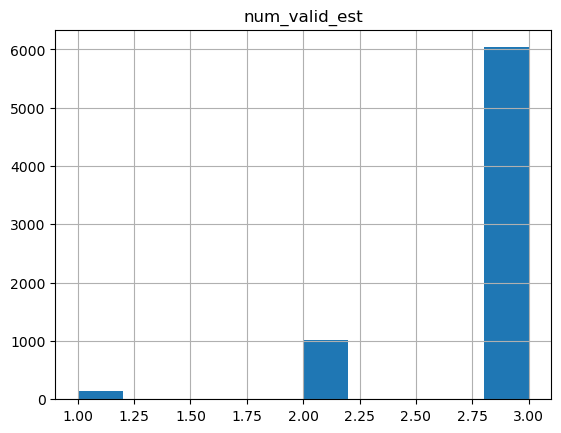

In [11]:
print('/recorded events: ', np.unique(timelog[timelog['Multiple_crop']==0]['num_valid_est'], return_counts=True)[1]/timelog[timelog['Multiple_crop']==0].shape[0])
print('/recorded events: ', np.unique(timelog[timelog['Multiple_crop']==0]['num_valid_est'], return_counts=True)[1]/4)
print('/all events: ', np.unique(timelog[timelog['Multiple_crop']==0]['num_valid_est'], return_counts=True)[1]/(16*148*4))
timelog[timelog['Multiple_crop']==0].hist(['num_valid_est'])

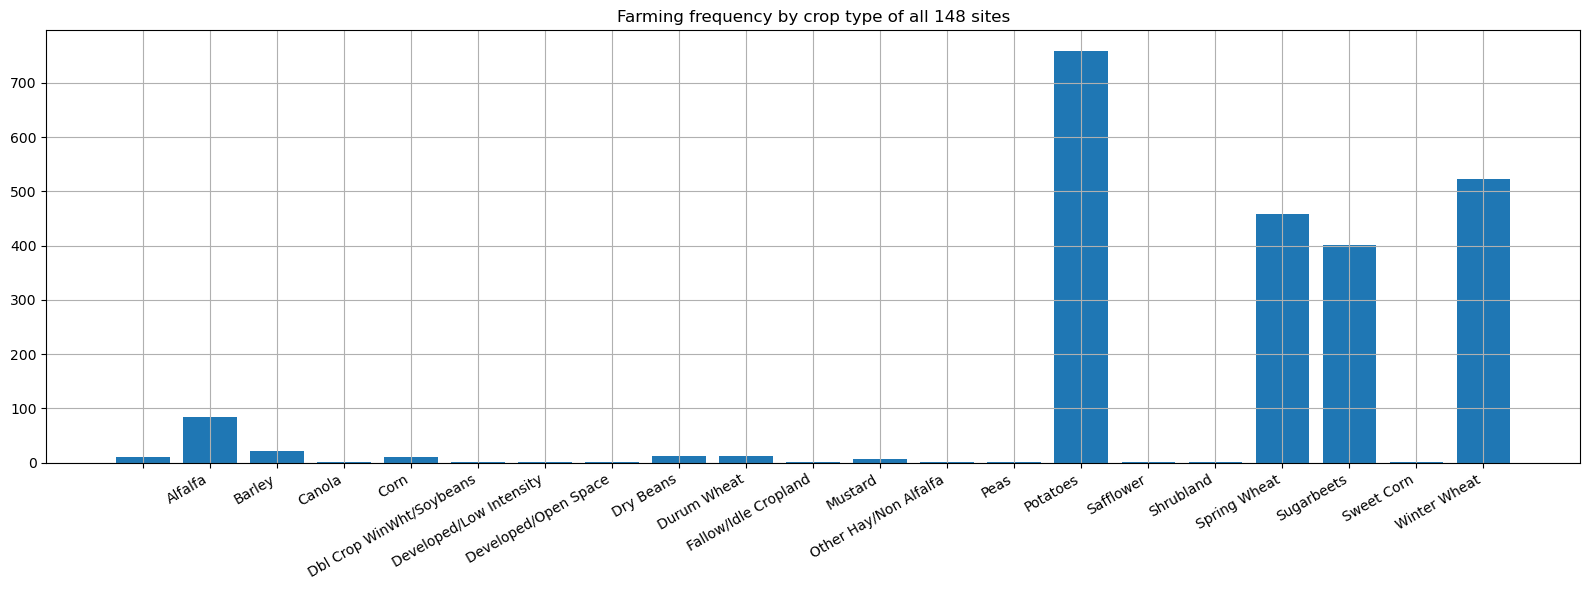

In [12]:
crop_count=np.unique(timelog['Crop'], return_counts=True)
fig, ax = plt.subplots(figsize=(16,6))
plt.bar(crop_count[0],(crop_count[1]/4))
plt.grid()
plt.title('Farming frequency by crop type of all 148 sites')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()

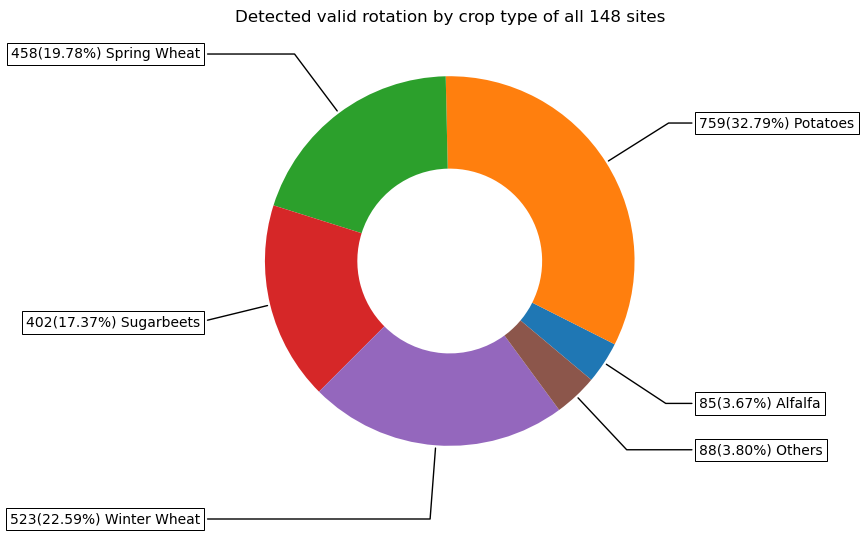

In [15]:
cc1=crop_count[1][[1, 14, 17, 18, 20]]
cl1=crop_count[0][[1, 14, 17, 18, 20]]
cc2=np.delete(crop_count[1],[1,14, 17, 18, 20])
cc=np.append(cc1, cc2.sum())
cl=np.append(cl1, 'Others')

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

tags = []
for i in range(len(cl)):
    tags.append(str(int(cc[i]/4)) + f'({cc[i]/np.sum(cc)*100:.02f}%)' + ' ' + cl[i])
data = cc/4

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(tags[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Detected valid rotation by crop type of all 148 sites")

plt.savefig('piechart.pdf', format='pdf', bbox_inches='tight')


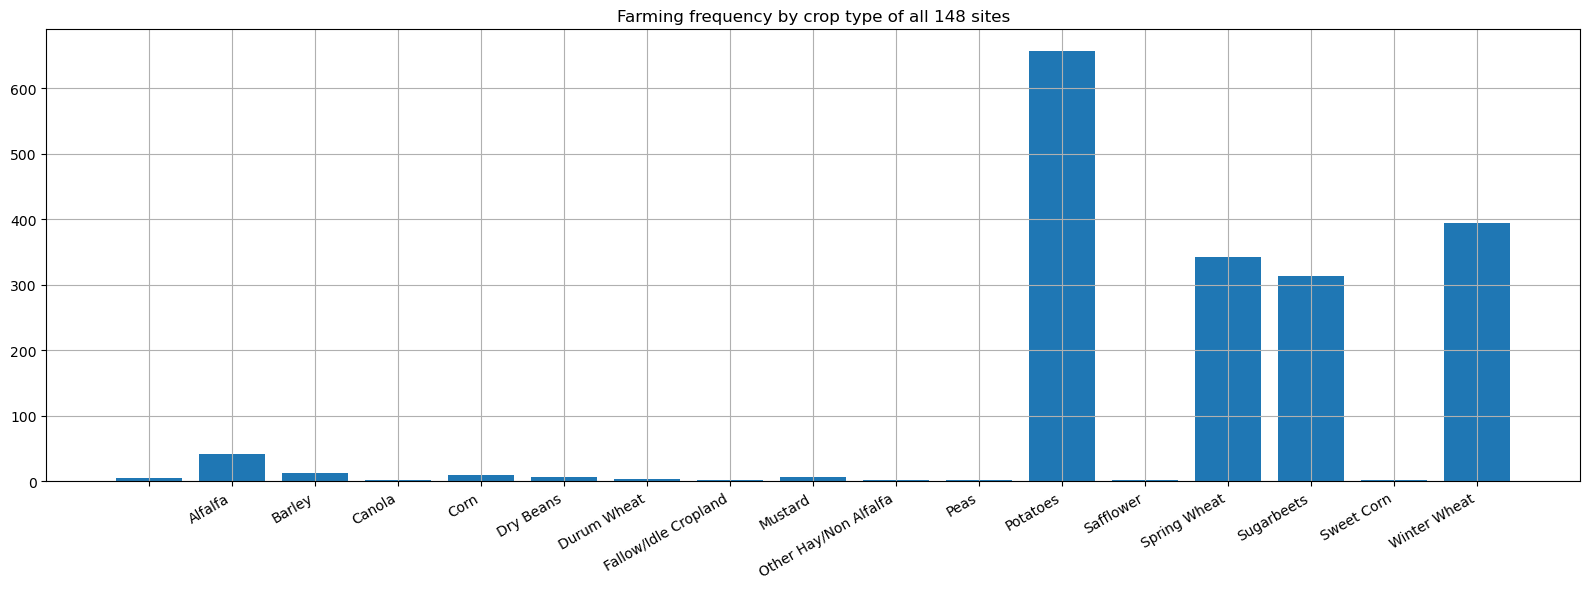

In [16]:
crop_count=np.unique(timelog[timelog['Multiple_crop']==0]['Crop'], return_counts=True)
fig, ax = plt.subplots(figsize=(16,6))
plt.bar(crop_count[0],(crop_count[1]/4))
plt.grid()
plt.title('Farming frequency by crop type of all 148 sites')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()

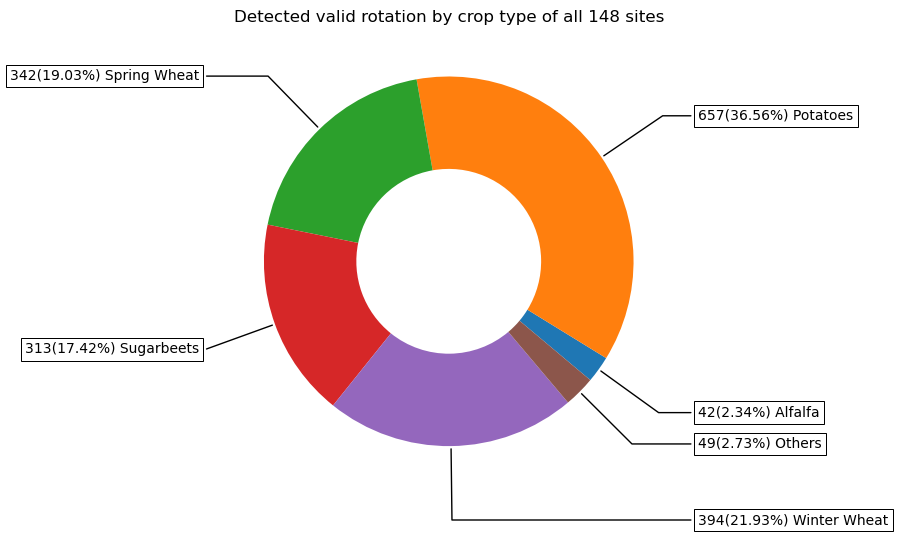

In [17]:
cc1=crop_count[1][[1, 11, 13, 14, 16]]
cl1=crop_count[0][[1, 11, 13, 14, 16]]
cc2=np.delete(crop_count[1],[1,11, 13, 14, 16])
cc=np.append(cc1, cc2.sum())
cl=np.append(cl1, 'Others')


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

tags = []
for i in range(len(cl)):
    tags.append(str(int(cc[i]/4)) + f'({cc[i]/np.sum(cc)*100:.02f}%)' + ' ' + cl[i])
data = cc/4

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(tags[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Detected valid rotation by crop type of all 148 sites")

plt.show()

In [19]:
#source usda field crops usual planting and harvesting --idaho
#https://downloads.usda.library.cornell.edu/usda-esmis/files/vm40xr56k/dv13zw65p/w9505297d/planting-10-29-2010.pdf
potato_usual=[[pd.Timestamp(2009, 4, 6).dayofyear,pd.Timestamp(2009, 6, 9).dayofyear]
              ,[pd.Timestamp(2009, 8, 15).dayofyear,pd.Timestamp(2009, 10, 27).dayofyear]]

alfalfa_usual=[[0,0]
               ,[pd.Timestamp(2009, 5, 22).dayofyear,pd.Timestamp(2009, 10, 20).dayofyear]]

sugarbeets_usual=[[pd.Timestamp(2009, 3, 24).dayofyear,pd.Timestamp(2009, 5, 5).dayofyear]
                  ,[pd.Timestamp(2009, 9, 15).dayofyear,pd.Timestamp(2009, 11, 10).dayofyear]]

springwheat_usual=[[pd.Timestamp(2009, 3, 21).dayofyear,pd.Timestamp(2009, 5, 26).dayofyear]
                   ,[pd.Timestamp(2009, 8, 4).dayofyear,pd.Timestamp(2009, 9, 29).dayofyear]]

winterwheat_usual=[[pd.Timestamp(2008, 9, 8).dayofyear,pd.Timestamp(2008, 11, 3).dayofyear]
                   ,[pd.Timestamp(2009, 7, 23).dayofyear,pd.Timestamp(2009, 9, 14).dayofyear]]

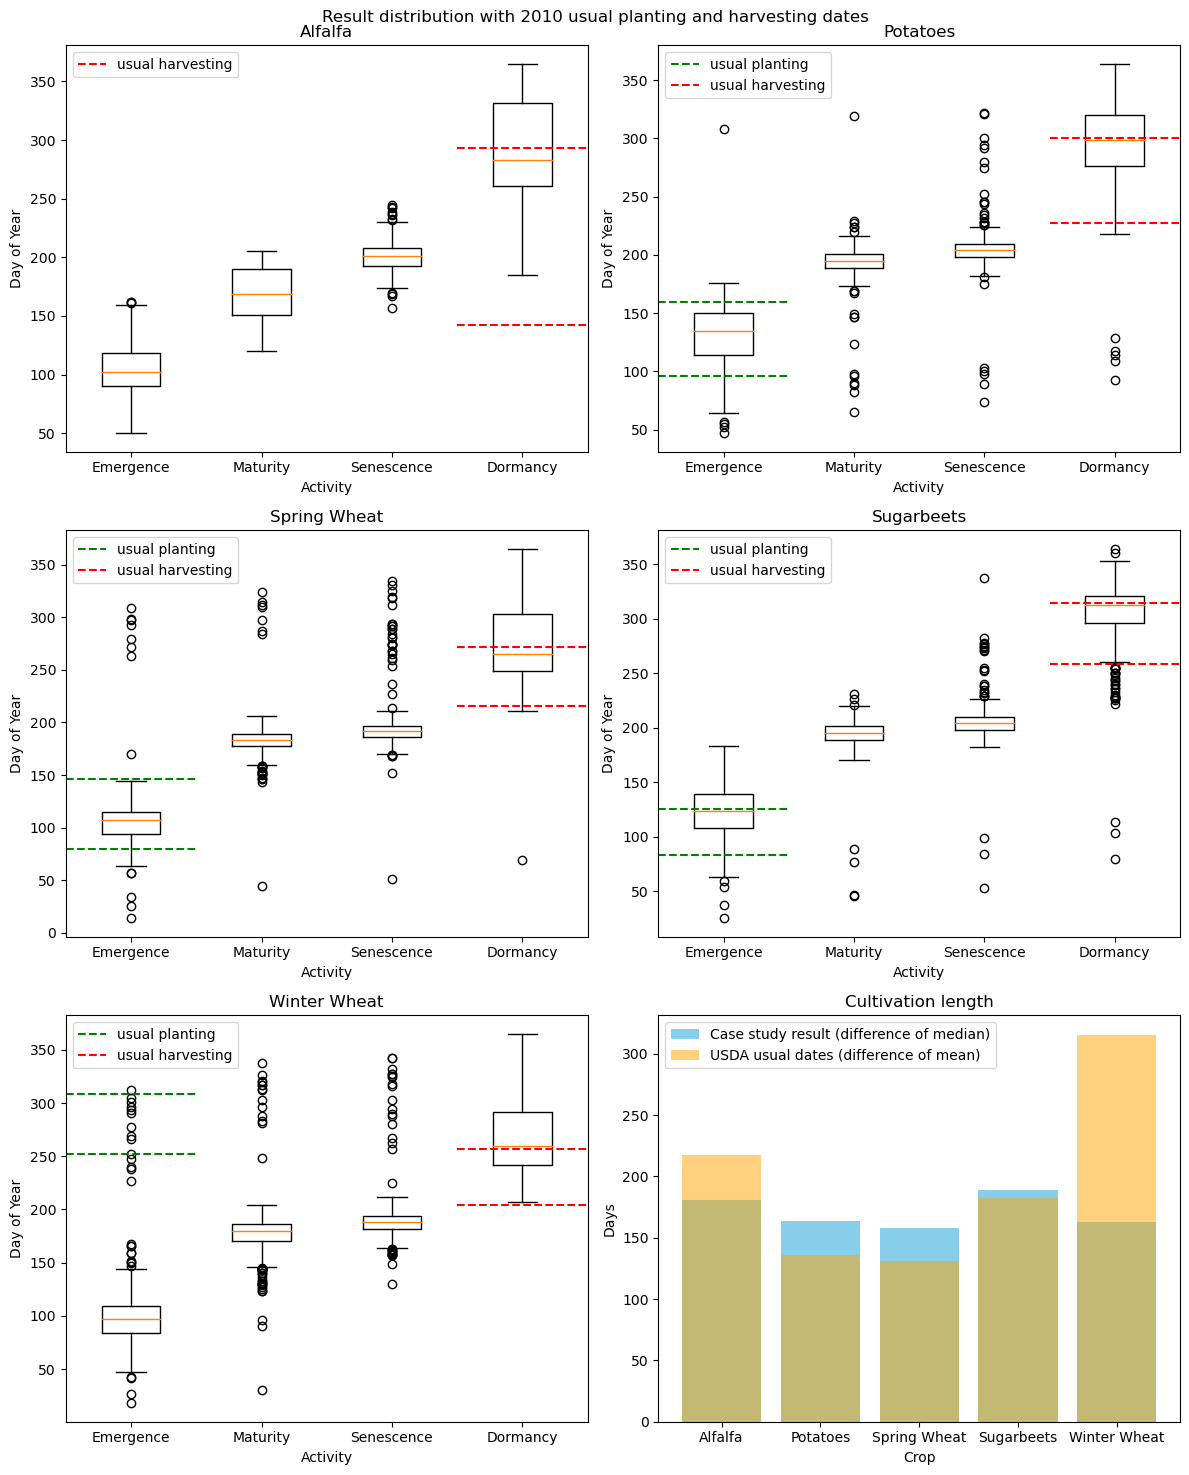

In [20]:
timelog['Day_of_Year'] = timelog['Timestamp'].dt.dayofyear

crops = ['Alfalfa', 'Potatoes', 'Spring Wheat', 'Sugarbeets', 'Winter Wheat']
usual = [alfalfa_usual, potato_usual, springwheat_usual, sugarbeets_usual, winterwheat_usual]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,15))#, sharex=True)
axes=axes.flatten()

for i, crop in enumerate(crops):
    crop_df = timelog[timelog['Crop'] == crop]
    axes[i].boxplot([crop_df[crop_df['Activity'] == activity]['Day_of_Year'] for activity in ['Emergence', 'Maturity', 'Senescence', 'Dormancy']], labels=['Emergence', 'Maturity', 'Senescence', 'Dormancy'])
    if usual[i][0][0] != 0:
        axes[i].hlines(usual[i][0], 0.5, 1.5, ls='--', lw=1.5, color='g', label='usual planting')

    axes[i].hlines(usual[i][1], 3.5, 4.5, ls='--', lw=1.5, color='r', label='usual harvesting')
    axes[i].set_ylabel('Day of Year')
    axes[i].set_title(f'{crop}')
    axes[i].set_xlabel('Activity')
    axes[i].legend()

differences = []

for crop in crops:
    crop_df = timelog[timelog['Crop'] == crop]
    emergence_median = crop_df[crop_df['Activity'] == 'Emergence']['Day_of_Year'].median()
    dormancy_median = crop_df[crop_df['Activity'] == 'Dormancy']['Day_of_Year'].median()
    difference = dormancy_median - emergence_median
    differences.append(difference)

usual_differences = []

for crop in crops:
    emergence = np.mean(usual[crops.index(crop)][0])
    dormancy = np.mean(usual[crops.index(crop)][1])
    if crop == 'Winter Wheat':
        difference = dormancy + 365 - emergence
    else:
        difference = dormancy - emergence
    usual_differences.append(difference)

axes[-1].bar(crops, differences, color='skyblue', label='Case study result (difference of median)')
axes[-1].bar(crops, usual_differences, color='orange', alpha=0.5, label='USDA usual dates (difference of mean)')
axes[-1].set_xlabel('Crop')
axes[-1].set_ylabel('Days')
axes[-1].set_title('Cultivation length')
axes[-1].legend()

plt.suptitle('Result distribution with 2010 usual planting and harvesting dates')
plt.tight_layout()
plt.savefig('Result/boxplot.pdf', format='pdf', bbox_inches='tight')
plt.show()


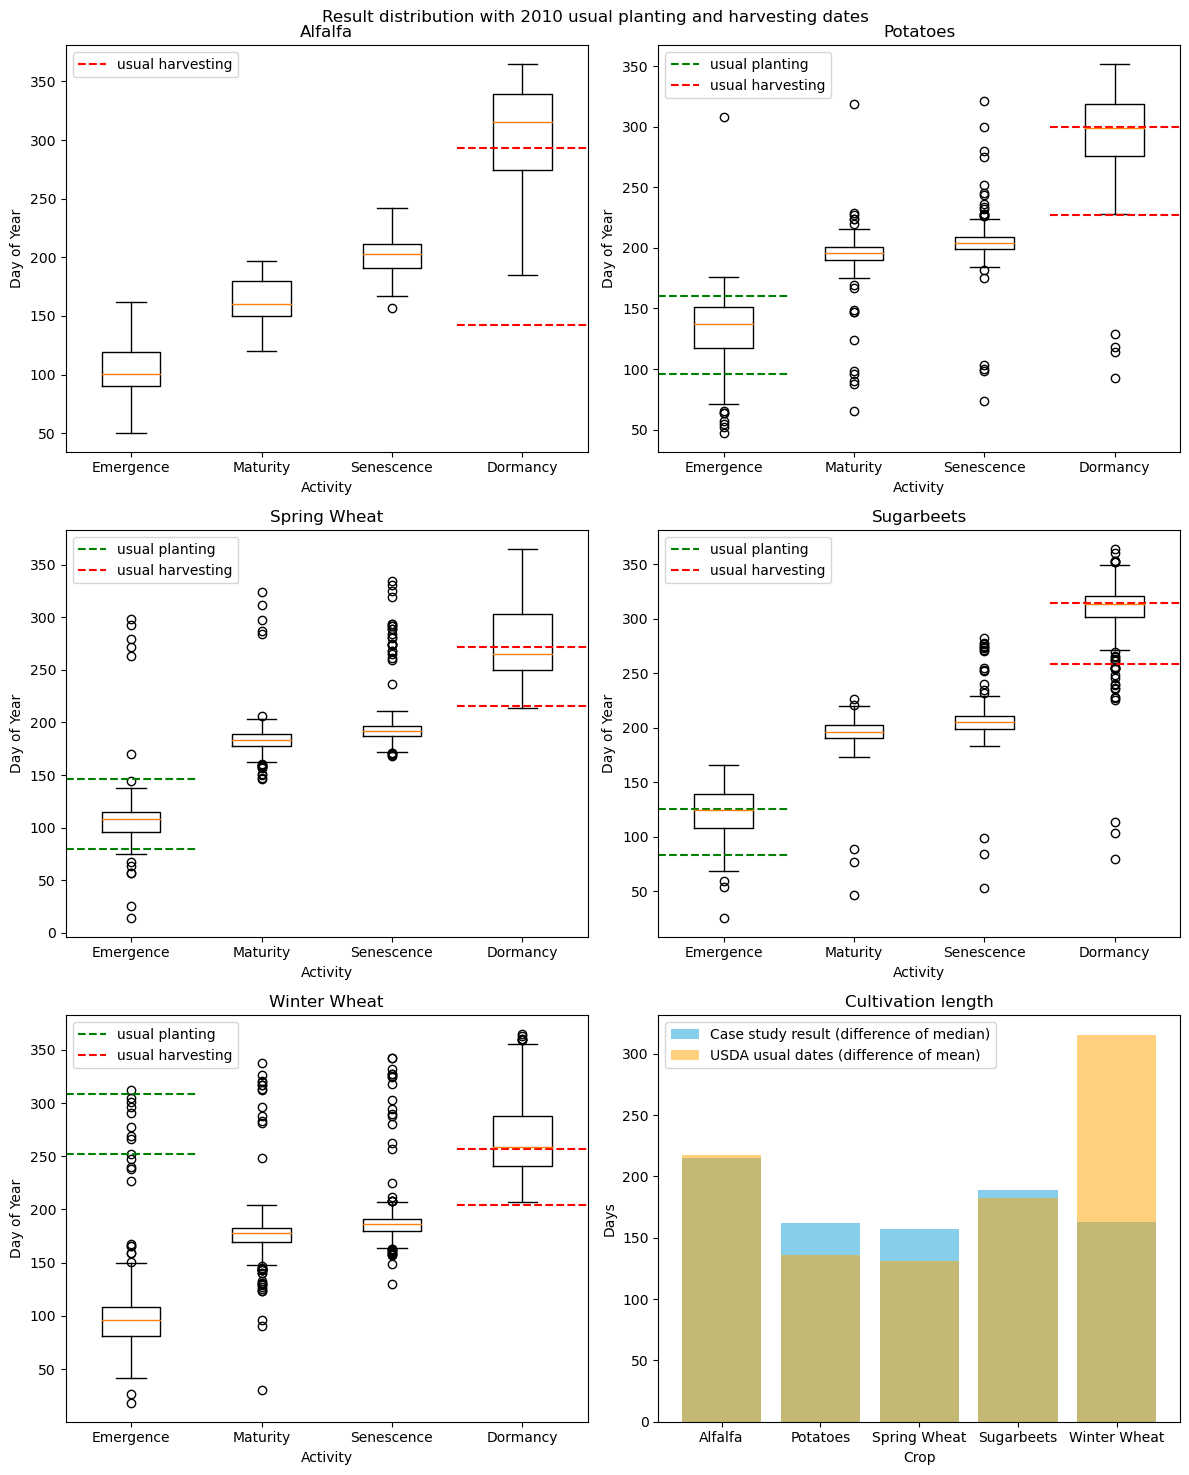

In [21]:
timelog['Day_of_Year'] = timelog['Timestamp'].dt.dayofyear

crops = ['Alfalfa', 'Potatoes', 'Spring Wheat', 'Sugarbeets', 'Winter Wheat']
usual = [alfalfa_usual, potato_usual, springwheat_usual, sugarbeets_usual, winterwheat_usual]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,15))#, sharex=True)
axes=axes.flatten()

for i, crop in enumerate(crops):
    crop_df = timelog[timelog['Multiple_crop']==0][timelog[timelog['Multiple_crop']==0]['Crop'] == crop]
    axes[i].boxplot([crop_df[crop_df['Activity'] == activity]['Day_of_Year'] for activity in ['Emergence', 'Maturity', 'Senescence', 'Dormancy']], labels=['Emergence', 'Maturity', 'Senescence', 'Dormancy'])
    if usual[i][0][0] != 0:
        axes[i].hlines(usual[i][0], 0.5, 1.5, ls='--', lw=1.5, color='g', label='usual planting')

    axes[i].hlines(usual[i][1], 3.5, 4.5, ls='--', lw=1.5, color='r', label='usual harvesting')
    axes[i].set_ylabel('Day of Year')
    axes[i].set_title(f'{crop}')
    axes[i].set_xlabel('Activity')
    axes[i].legend()

differences = []

for crop in crops:
    crop_df = timelog[timelog['Multiple_crop']==0][timelog[timelog['Multiple_crop']==0]['Crop'] == crop]
    emergence_median = crop_df[crop_df['Activity'] == 'Emergence']['Day_of_Year'].median()
    dormancy_median = crop_df[crop_df['Activity'] == 'Dormancy']['Day_of_Year'].median()
    difference = dormancy_median - emergence_median
    differences.append(difference)

usual_differences = []

for crop in crops:
    emergence = np.mean(usual[crops.index(crop)][0])
    dormancy = np.mean(usual[crops.index(crop)][1])
    if crop == 'Winter Wheat':
        difference = dormancy + 365 - emergence
    else:
        difference = dormancy - emergence
    usual_differences.append(difference)

axes[-1].bar(crops, differences, color='skyblue', label='Case study result (difference of median)')
axes[-1].bar(crops, usual_differences, color='orange', alpha=0.5, label='USDA usual dates (difference of mean)')
axes[-1].set_xlabel('Crop')
axes[-1].set_ylabel('Days')
axes[-1].set_title('Cultivation length')
axes[-1].legend()

plt.suptitle('Result distribution with 2010 usual planting and harvesting dates')
plt.tight_layout()
plt.show()


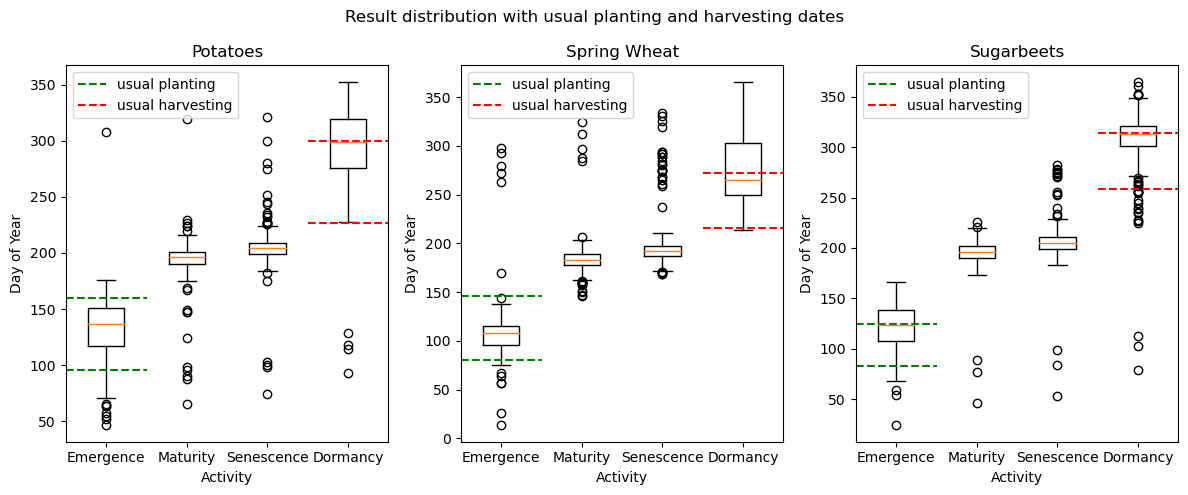

In [22]:
timelog['Day_of_Year'] = timelog['Timestamp'].dt.dayofyear

crops = ['Potatoes', 'Spring Wheat', 'Sugarbeets']
usual = [potato_usual, springwheat_usual, sugarbeets_usual]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,5))#, sharex=True)
axes=axes.flatten()

for i, crop in enumerate(crops):
    crop_df = timelog[timelog['Multiple_crop']==0][timelog[timelog['Multiple_crop']==0]['Crop'] == crop]
    axes[i].boxplot([crop_df[crop_df['Activity'] == activity]['Day_of_Year'] for activity in ['Emergence', 'Maturity', 'Senescence', 'Dormancy']], labels=['Emergence', 'Maturity', 'Senescence', 'Dormancy'])
    axes[i].hlines(usual[i][0], 0.5, 1.5, ls='--', lw=1.5, color='g', label='usual planting')
    axes[i].hlines(usual[i][1], 3.5, 4.5, ls='--', lw=1.5, color='r', label='usual harvesting')
    axes[i].set_ylabel('Day of Year')
    axes[i].set_title(f'{crop}')
    axes[i].set_xlabel('Activity')
    axes[i].legend()


plt.suptitle('Result distribution with usual planting and harvesting dates')
plt.tight_layout()
plt.savefig('Result/boxplot_3crop.pdf', format='pdf')
plt.show()
